In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score, roc_auc_score, auc, precision_recall_curve, roc_curve
from sklearn.preprocessing import LabelEncoder
import graphviz
import seaborn as sns

1

In [46]:
df = pd.read_csv('dataset3_l4.csv')

2

In [47]:
print(df.shape[1], ' - кількість полів\n', df.shape[0], ' - кількість записів', sep='')

17 - кількість полів
2111 - кількість записів


3

In [48]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

4

In [49]:
# Function to factorize all string columns
def factorize_string_columns(df):
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = pd.factorize(df[column])[0]
    return df

In [50]:
df = factorize_string_columns(df)

In [55]:
n = 4

spliter = ShuffleSplit(n, train_size=0.7, random_state=1)
train_index, test_index = list(spliter.split(df))[1]
train_x, train_y, test_x, test_y = df.iloc[:, :-1].loc[train_index], df.iloc[:, -1].loc[train_index], df.iloc[:, :-1].loc[test_index], df.iloc[:, -1].loc[test_index]

In [56]:
train_x.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
84,1,25.000000,1.700000,83.000000,0,1,2.000000,3.000000,1,0,2.000000,0,0.000000,1.000000,1,0
1650,1,31.363470,1.869323,127.507411,0,1,2.939727,3.000000,0,1,1.344122,0,0.923428,1.432336,1,0
1620,1,21.544554,1.849980,122.609911,0,1,3.000000,1.971659,0,0,1.179254,0,0.178856,0.000000,1,0
1315,1,36.023972,1.670667,90.575934,0,1,2.903545,1.508685,0,0,2.450069,0,1.454730,0.000000,1,2
848,1,19.337404,1.859927,87.105828,0,1,2.212320,4.000000,0,0,2.374044,0,2.000000,0.622638,1,0


In [57]:
train_y.value_counts()

NObeyesdad
3    239
6    219
0    218
2    203
5    201
4    201
1    196
Name: count, dtype: int64

5

In [58]:
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier()

6

In [64]:
def get_metrics(trues, prediction):
  diction = {}
  diction['Accuracy'] = [accuracy_score(trues, prediction)]
  diction['Precision'] = [precision_score(trues, prediction, average='weighted')]
  diction['Recall'] = [recall_score(trues, prediction, average='weighted')]
  diction['F-Scores'] = [f1_score(trues, prediction, average='weighted')]
  diction['Matthews Correlation Coefficient'] = [matthews_corrcoef(trues, prediction)]
  diction['Balanced Accuracy'] = [balanced_accuracy_score(trues, prediction)]
  return pd.DataFrame(diction)

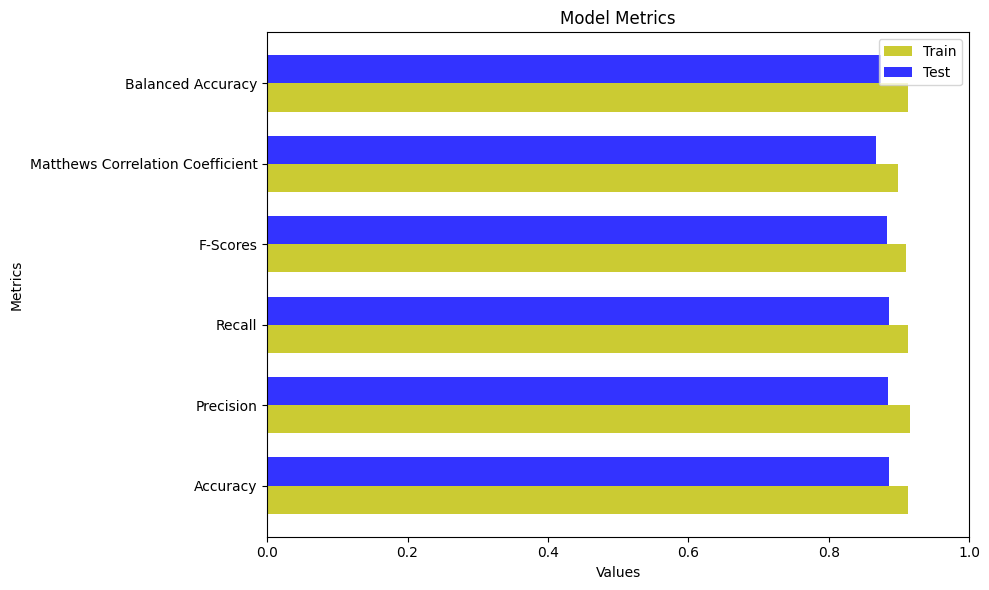

In [70]:
metrics_test = get_metrics(test_y, knn.predict(test_x))
metrics_train = get_metrics(train_y, knn.predict(train_x))

n_metrics = len(metrics_test.columns)
index = np.array(range(n_metrics))

plt.figure(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

rects1 = plt.barh(index, metrics_train.loc[0], bar_width,
                  alpha=opacity,
                  color='y',
                  label='Train')

rects2 = plt.barh(index + bar_width, metrics_test.loc[0], bar_width,
                  alpha=opacity,
                  color='b',
                  label='Test')

plt.xlabel('Values')
plt.ylabel('Metrics')
plt.title('Model Metrics')
plt.yticks(index + bar_width / 2, metrics_test.columns)
plt.xlim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

7

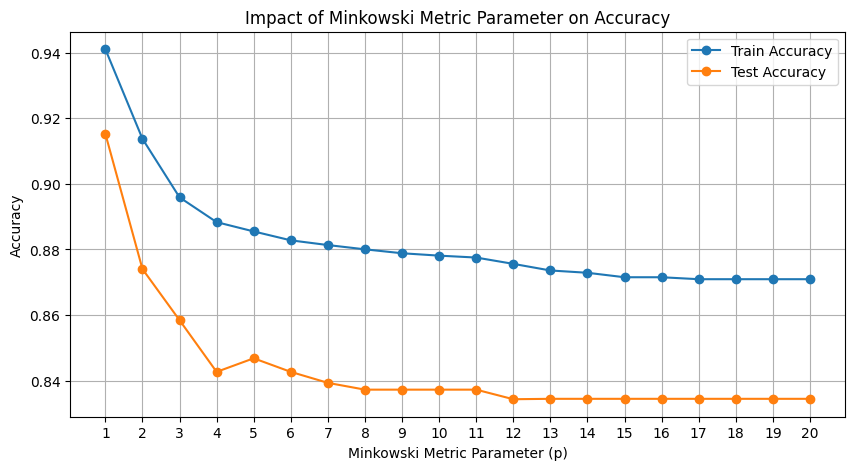

In [73]:
minkowski_p_range = range(1, 21)
train_accuracies = []
test_accuracies = []

for p in minkowski_p_range:
    knn = KNeighborsClassifier(p=p)
    knn.fit(train_x, train_y)
    train_accuracies.append(balanced_accuracy_score(train_y, knn.predict(train_x)))
    test_accuracies.append(balanced_accuracy_score(test_y, knn.predict(test_x)))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(minkowski_p_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(minkowski_p_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Minkowski Metric Parameter (p)')
plt.xticks(minkowski_p_range)
plt.ylabel('Accuracy')
plt.title('Impact of Minkowski Metric Parameter on Accuracy')
plt.legend()
plt.grid(True)
plt.show()